<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-05-15 15:31:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  61.5MB/s    in 3.3s    

2025-05-15 15:31:44 (61.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas
!pip install matplotlib

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 163.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 189.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 168.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 157.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 136.5 MB/s eta 0:00:00


#### Connect to the SQLite database


In [3]:
df = pd.read_csv("Lab 13.csv")

conn = sqlite3.connect('survey-data.sqlite')
df.to_sql('main', conn, if_exists='replace', index=False)
conn.close()

In [4]:
conn = sqlite3.connect('survey-data.sqlite')

QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

df_check.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore,Log_ConvertedCompYearly,ExperienceLevel,ExperienceRange,TipoEmpleoAgrupado,AgeNumeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,None,None,None,None,None,None,Senior,10-20,Full time,16.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,None,None,None,None,None,None,Expert,10-20,Full time,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,Easy,None,None,None,None,None,Expert,20+,Full time,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,Easy,None,None,None,None,None,Senior,10-20,Full time,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Other...,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,Easy,None,None,None,None,None,Senior,10-20,Full time,21.0


## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


**Demo 2: List all tables**


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


**Demo 3: Group data by age**


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  24233
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


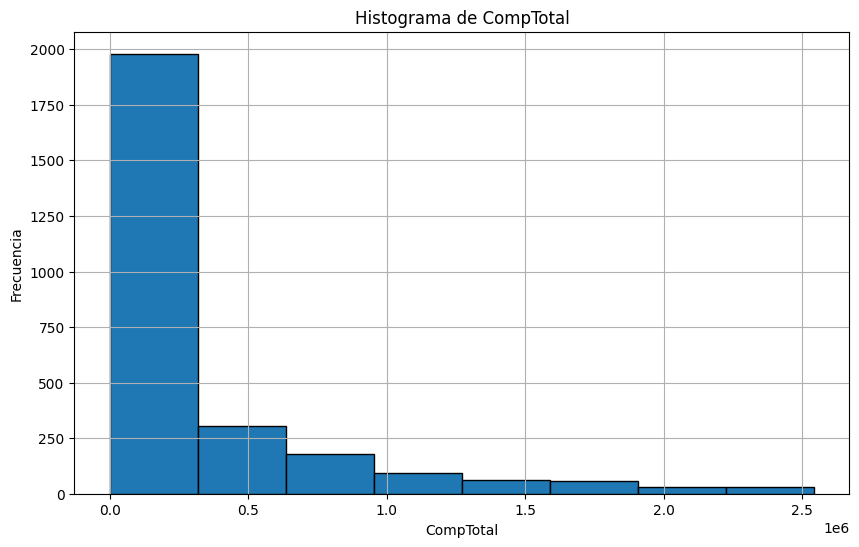

In [8]:
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
GROUP BY CompTotal
"""
df = pd.read_sql_query(QUERY, conn)

Q1 = df["CompTotal"].quantile(0.25)
Q3 = df["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["CompTotal"] >= limite_inferior) & (df["CompTotal"] <= limite_superior)]

plt.figure(figsize=(10, 6))
plt.hist(new_df["CompTotal"], bins=8, edgecolor='black')
plt.title("Histograma de CompTotal")
plt.xlabel("CompTotal")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


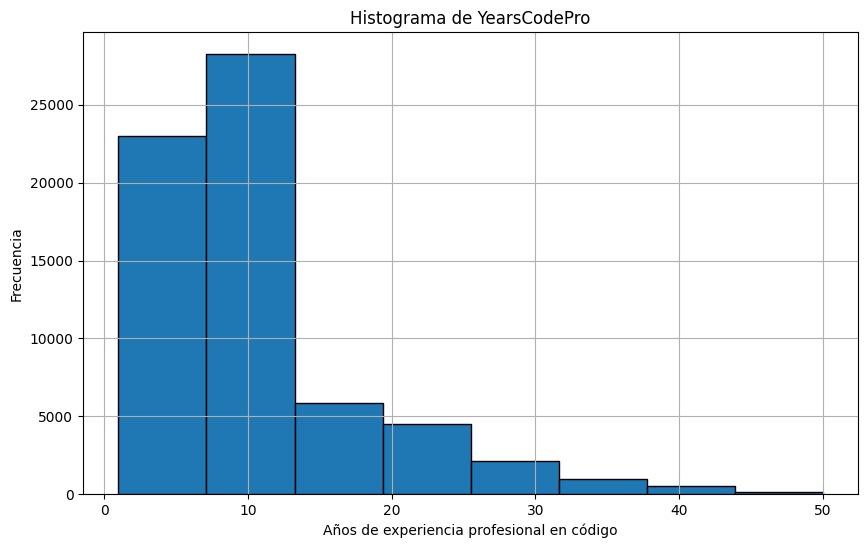

In [9]:
QUERY = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""

df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df["YearsCodePro"], bins=8, edgecolor='black')
plt.title("Histograma de YearsCodePro")
plt.xlabel("Años de experiencia profesional en código")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


/tmp/ipykernel_301/1528444820.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['AgeGroup'] = pd.cut(new_df['AgeNumeric'], bins=bins, labels=labels)


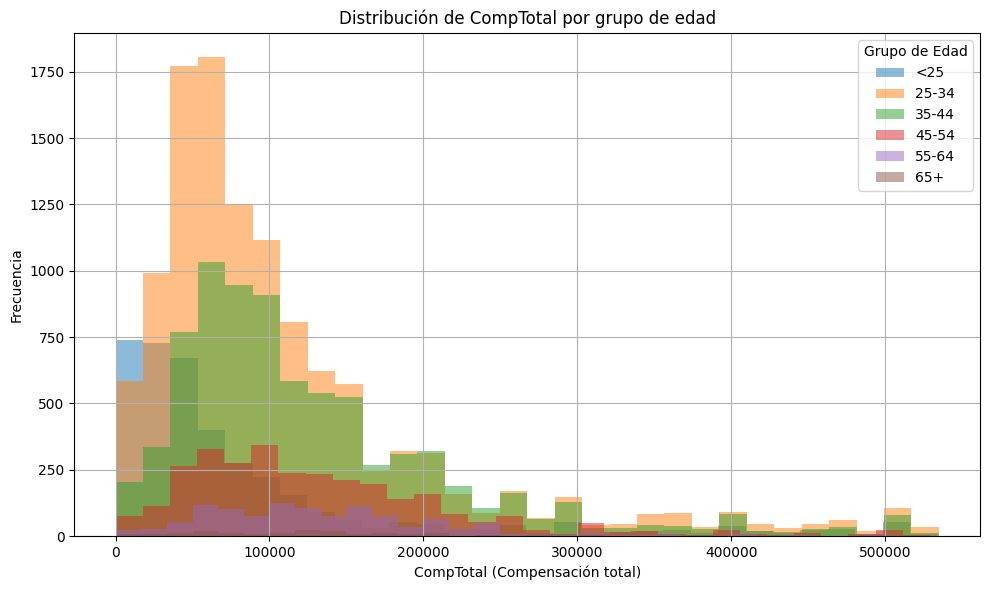

In [10]:
QUERY = """
SELECT AgeNumeric, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(QUERY,conn)

Q1 = df["CompTotal"].quantile(0.25)
Q3 = df["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

new_df = df[(df["CompTotal"] >= limite_inferior) & (df["CompTotal"] <= limite_superior)]

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
new_df['AgeGroup'] = pd.cut(new_df['AgeNumeric'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))

for label in labels:
    subset = new_df[new_df['AgeGroup'] == label]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=label)

plt.xlabel('CompTotal (Compensación total)')
plt.ylabel('Frecuencia')
plt.title('Distribución de CompTotal por grupo de edad')
plt.legend(title='Grupo de Edad')
plt.grid(True)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


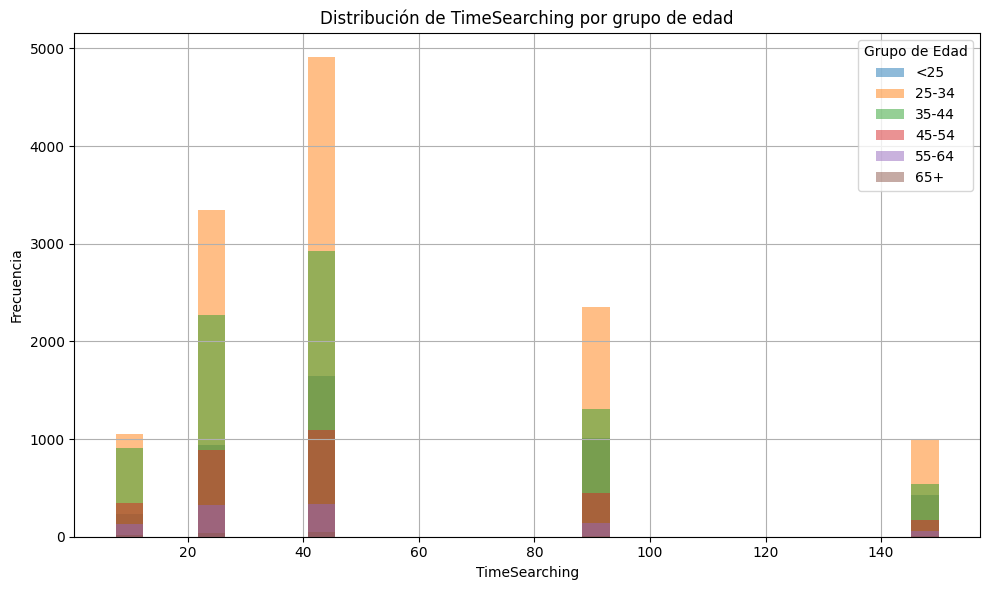

In [11]:
QUERY = """
SELECT AgeNumeric, TimeSearching
FROM main
WHERE AgeNumeric IS NOT NULL AND TimeSearching IS NOT NULL
"""
df= pd.read_sql_query(QUERY,conn)

TimeSearching_map = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeSearching'] = df['TimeSearching'].map(TimeSearching_map)

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['AgeNumeric'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))

for label in labels:
    subset = df[df['AgeGroup'] == label]
    plt.hist(subset['TimeSearching'], bins=30, alpha=0.5, label=label)

plt.xlabel("TimeSearching")
plt.ylabel('Frecuencia')
plt.title('Distribución de TimeSearching por grupo de edad')
plt.legend(title='Grupo de Edad')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


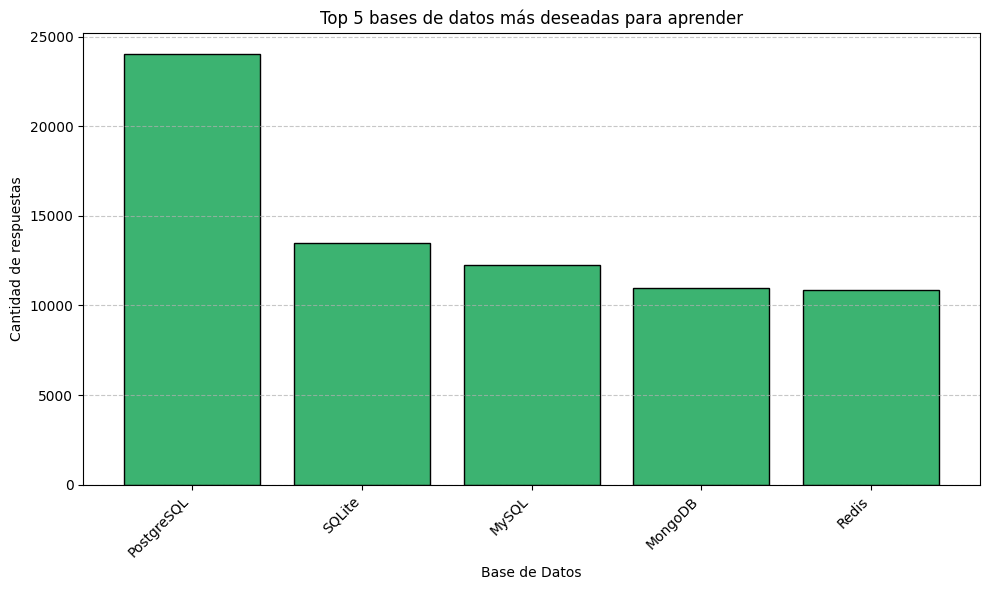

In [20]:
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

df_expanded = df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()
top_databases = df_expanded.value_counts().head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_databases.index, top_databases.values, color='mediumseagreen', edgecolor='black')
plt.title("Top 5 bases de datos más deseadas para aprender")
plt.xlabel("Base de Datos")
plt.ylabel("Cantidad de respuestas")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


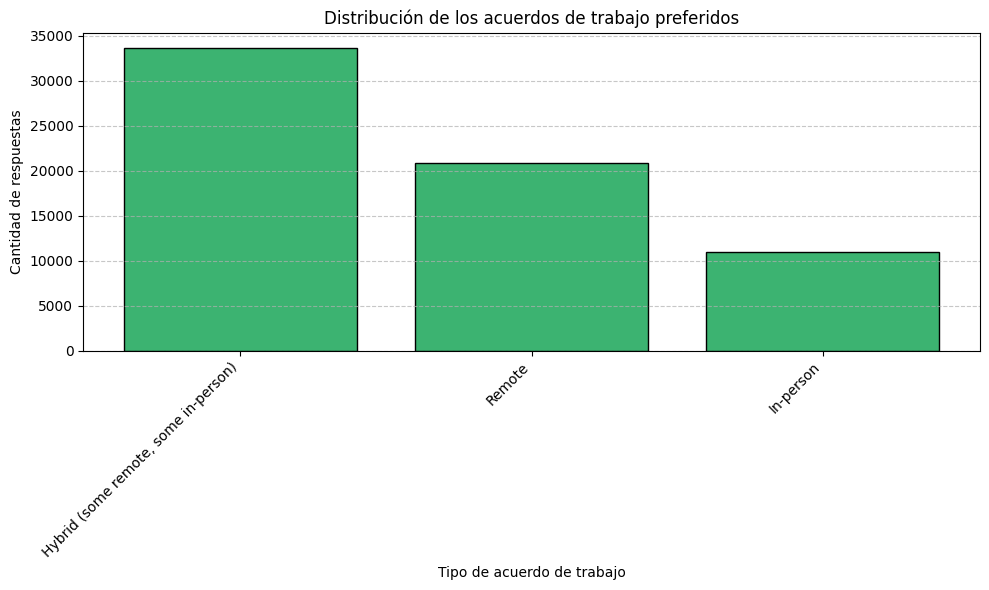

In [33]:
QUERY = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)
remote_counts = df['RemoteWork'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(remote_counts.index.astype(str), remote_counts.values, color='mediumseagreen', edgecolor='black')
plt.title("Distribución de los acuerdos de trabajo preferidos")
plt.xlabel("Tipo de acuerdo de trabajo")
plt.ylabel("Cantidad de respuestas")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


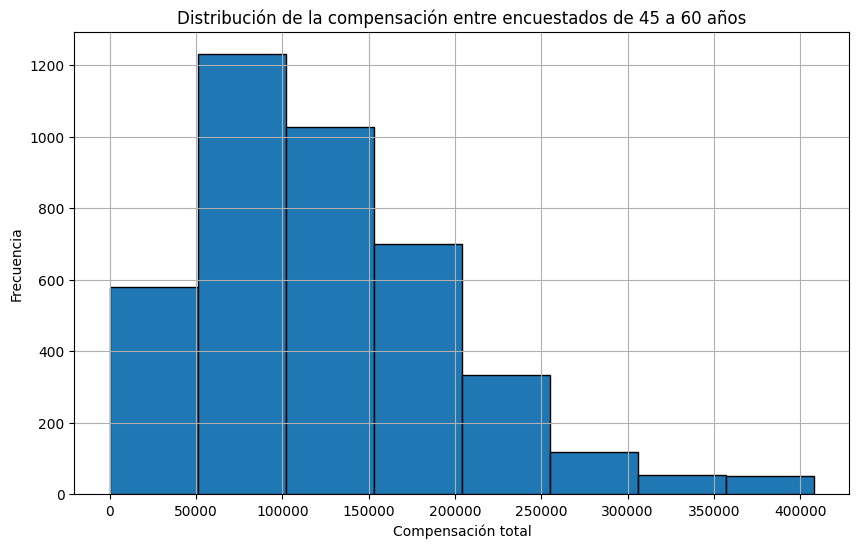

In [35]:
QUERY = """
SELECT AgeNumeric, CompTotal
FROM main
WHERE AgeNumeric BETWEEN 45 AND 60 AND CompTotal IS NOT NULL
"""
X = pd.read_sql_query(QUERY,conn)

Q1 = X["CompTotal"].quantile(0.25)
Q3 = X["CompTotal"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

X = X[(X["CompTotal"] >= limite_inferior) & (X["CompTotal"] <= limite_superior)]

plt.figure(figsize=(10, 6))
plt.hist(X["CompTotal"], bins=8, edgecolor='black')
plt.title("Distribución de la compensación entre encuestados de 45 a 60 años")
plt.xlabel("Compensación total")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


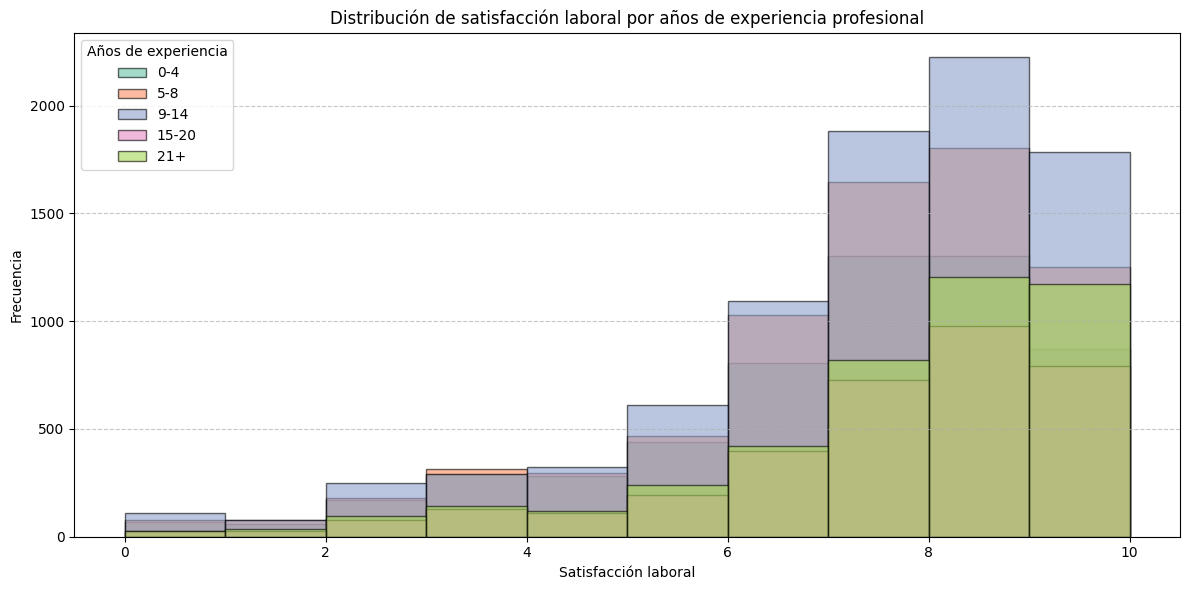

In [42]:
QUERY = """
SELECT YearsCodePro, JobSat
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL
"""
X = pd.read_sql_query(QUERY,conn)

bins = [0, 4, 8, 14, 20, 51]
labels = ['0-4', '5-8', '9-14', '15-20', '21+']
X['ExperienceGroup'] = pd.cut(X['YearsCodePro'], bins=bins, labels=labels, right=False)

colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

plt.figure(figsize=(12, 6))

for i, label in enumerate(labels):
    subset = X[X['ExperienceGroup'] == label]
    plt.hist(subset['JobSat'], bins=10, alpha=0.6, label=label, color=colors[i], edgecolor='black')

plt.title("Distribución de satisfacción laboral por años de experiencia profesional")
plt.xlabel("Satisfacción laboral")
plt.ylabel("Frecuencia")
plt.legend(title='Años de experiencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [43]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
